In [ ]:
!pip install seaborn

You should consider upgrading via the '/opt/venv/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
from enum import Enum
from sympy import *

pd.options.display.max_columns = 200

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 12
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
!pip install sympy

You should consider upgrading via the '/opt/venv/bin/python3 -m pip install --upgrade pip' command.


## Метод деления отрезка пополам

In [ ]:
def bisection_method(a, b, x, f, eps):
    delta = 0.0001
    n = 0
    while abs(b-a) >= eps:
        n += 1
        u1 = (b + a - delta)/2
        u2 = (b + a + delta)/2
        # print(u1, u2)
        f_u1 = f(u1)
        f_u2 = f(u2)
        if f_u1 < f_u2:
            b = u2
        elif f_u1 > f_u2:
            a = u1
        elif f_u1 == f_u2:
            b = u2
            a = u1
        # print(a, b)
    return (b+a)/2, f((b+a)/2), n

## Метод "золотого сечения"

In [ ]:
def golden_section(f, a, b, eps):
    n = 0
    # print((" {0:.8s}  ||   {1:.1s}    ||    {2:.1s}   || {3:.5s}  ||   {4:.2s}   ||   {5:.2s}   ||  {6:.5s}  ||  {7:.5s}").format("Итерация", "a", "b", "b - a", "u1", "u2", "J(u1)", "J(u2)"))
    alpha = (math.sqrt(5) - 1) / 2
    alpha_1 = (3 - math.sqrt(5)) / 2
    u_1 = a + alpha_1 * (b-a)
    u_2 = a + alpha * (b-a)
    J_1 = f(u_1)
    J_2 = f(u_2)
    while b - a >= eps:
        n += 1
        # print(("     {0:.0f}     || {1:.4f} || {2:.4f} || {3:.4f} || {4:.4f} || {5:.4f} || {6:.4f} || {7:.4f}").format(n,a, b, b - a, u_1, u_2, J_1, J_2))
        if J_1 < J_2:
            b = u_2
            u_2 = u_1
            J_2 = J_1
            u_1 = a + alpha_1 * (b-a)
            J_1 = f(u_1)
        elif J_1 > J_2:
            a = u_1
            u_1 = u_2
            J_1 = J_2
            u_2 = a + alpha * (b-a)
            J_2 = f(u_2)
        else:
            b = u_2
            a = u_1
            u_1 = a + alpha_1 * (b-a)
            u_2 = a + alpha * (b-a)
            J_1 = f(u_1)
            J_2 = f(u_2)
    n = n+1
    # print(("     {0:.0f}     || {1:.4f} || {2:.4f} || {3:.4f} || {4:.4f} || {5:.4f} || {6:.4f} || {7:.4f}").format(n,a, b, b - a, u_1, u_2, J_1, J_2))
    u_min = (b + a) / 2
    J_min = f(u_min)
    return u_min, J_min, n

## Метод парабол

In [ ]:
def f_parabola(u1, u3, x, f, eps):
    u2 = (u3 + u1) / 2
    i = 0
    u2_test = u2
    delta_minus = f(u1) - f(u2)
    delta_plus = f(u3) - f(u2)
    w = u2 + ((u3 - u2)**2 * delta_minus - (u2 - u1)**2 * delta_plus)/(2*((u3 - u2) * delta_minus + (u2 - u1) * delta_plus))
    while abs(u2_test - w) >= eps:
        i += 1
        delta_minus = f(u1) - f(u2)
        delta_plus = f(u3) - f(u2)
        if delta_minus + delta_plus == 0:
            sys.exit('strange')
        try:
            w = u2 + (((u3 - u2)**2 * delta_minus - (u2 - u1)**2 * delta_plus)/(2*((u3 - u2) * delta_minus + (u2 - u1) * delta_plus)))
        except ZeroDivisionError as excep:
            return u2, f(u2)
        u2_test = u2
        # print(f"u1={u1}, u2={u2}, u3={u3}")
        if w < u2:
            if f(w) < f(u2):
                # print(1)
                u3 = u2
                u2 = w
            elif f(w) > f(u2):
                # print(2)
                u1 = w
            else:
                # print(3)
                if f(u1) > f(u2):
                    u3 = u2
                    u2 = w
                elif f(u2) > f(u3):
                    u1 = w
        elif w > u2:
            if f(w) < f(u2):
                # print(4)
                u1 = u2
                u2 = w
            elif f(w) > f(u2):
                # print(5)
                u3 = w
            else:
                if f(u3) > f(u2):
                    u1 = u2
                    u2 = w
                elif f(u1) > f(u2):
                    u3 = w
        else:
            if f(u2 - 0.01) < f(u2):
                u2 -= 0.01
            else:
                u2 += 0.01
    return u2, f(u2), i

## Метод Ньютона

In [ ]:
def newton(u0, defaults, eps):
    def f_diff_1(x):
        return defaults[0]*5 * x**4 + defaults[1]*4 * x**3 + defaults[2]*3 * x**2 + defaults[3]*2 * x + defaults[4]

    def f_diff_2(x):
        return defaults[0]*20 * x**3 + defaults[1]*12 * x**2 + defaults[2]*6 * x + defaults[3]*2
        
    def f_diff_3(x):
        return defaults[0]*60 * x**2 + defaults[1]*24 * x + defaults[2]*6
        
    # print((" {0}  ||   {1}    ||    {2}   || {3}  ||   {4}   ||   {5}").format("Итерация", "u0", "F'(u0)", "F''(u0)", "h = f'(u0) / f''(u0)", "|f'(u0)|"))
    i = 0
    while abs(f_diff_1(u0)) > eps:
        i += 1
        # print(("     {0:.0f}     || {1:.4f} || {2:.4f} || {3:.4f} || {4:.4f} || {5:.4f}").format(i, u0, f_diff_1(u0), f_diff_2(u0), f_diff_1(u0)/f_diff_2(u0), abs(f_diff_1(u0))))
        if f_diff_2(u0) == 0:
            u0 += 0.1
            continue
        u0 = u0 - f_diff_1(u0)/f_diff_2(u0)
    return u0, f(u0), i

## Общая (объединение всех функций)

In [ ]:
def print_result(result):
    if result == Results.BISECTION:
        
        print('=============================')
        print('Метод деления отрезка пополам')
        print('=============================\n')
        
        x_min, f_min, n = bisection_method(a, b, x, f, eps)
        
        print(('Количество итераций: {0}').format(n))
        print(('Точка минимума: [{0:.4f}, {1:.4f}]\n').format(x_min, f_min))
        
    elif result == Results.GOLDEN:
        
        print('=============================')
        print('Метод "золотого сечения"')
        print('=============================\n')
        
        x_min, f_min, n = golden_section(f, a, b, eps)
        
        print(('Количество итераций: {0}').format(n))
        print(('Точка минимума: [{0:.4f}, {1:.4f}]\n').format(x_min, f_min))
        
    elif result == Results.PARABOLA:
        
        print('=============================')
        print('Метод парабол')
        print('=============================\n')
        
        x_min, f_min, n = f_parabola(a, b, x, f, eps)
        
        print(('Количество итераций: {0}').format(n))
        print(('Точка минимума: [{0:.4f}, {1:.4f}]\n').format(x_min, f_min))
        
    elif result == Results.NEWTON:
        
        print('=============================')
        print('Метод Ньютона')
        print('=============================\n')
        
        x_min, f_min, n = newton(u0, f.__defaults__, eps)
        
        print(('Начальная точка u0: {0}').format(u0))
        print(('Количество итераций: {0}').format(n))
        print(('Точка минимума: [{0:.4f}, {1:.4f}]\n').format(x_min, f_min))

In [ ]:
Results = Enum('Results', 'BISECTION GOLDEN PARABOLA NEWTON')

def f(x):
    default = f.__defaults__
    y = default[0]*x**5 + default[1]*x**4 + default[2]*x**3 + default[3]*x**2 + default[4]*x + default[5]
    return y

def interval_check(a, b):
    x = np.linspace(a, b, 50000)
    default = f.__defaults__
    y = default[0]*20*x**3 + default[1]*12*x**2 + default[2]*6*x + default[3]*2
    if not np.all(y>=0):
        print('Промежуток унимодальности задан неверно')
        sys.exit(-1)
    return x
    
''' по дефолту значения функции 10 варианта, свои можно задать через
    f.__defaults__  , суть в том, что в Python значения по умолчанию
    иницилизируются единожды'''
    
f.__defaults__ = (1, 0, 2/3, 0, -3, -5) #задавайте тут свои параметры

a = 0.0001
b = 5
u0 = 0.05 #точка для метода Ньютона
eps = 0.001
x = interval_check(a, b)

print_result(Results.BISECTION)
print_result(Results.GOLDEN)
print_result(Results.PARABOLA)
print_result(Results.NEWTON)

# plt.plot(x, f(x), label='stock plot')
# plt.legend()

# plt.plot(x_min, f_min, 'ro')
# plt.ylim(-10, 10)


Метод деления отрезка пополам

Количество итераций: 13
Точка минимума: [0.7743, -6.7351]

Метод "золотого сечения"

Количество итераций: 19
Точка минимума: [0.7749, -6.7351]

Метод парабол

Количество итераций: 11
Точка минимума: [0.7740, -6.7351]

Метод Ньютона

Начальная точка u0: 0.05
Количество итераций: 14
Точка минимума: [0.7746, -6.7351]



Функция для нахождения корней (вдруг нужно будет искать отрезки унимодальности)

In [ ]:
def korni(f):
    x = symbols('x', real=True)
    print(solve(f(x), x))
    
def f_diff_2(x):
    defaults = f.__defaults__
    return defaults[0]*20 * x**3 + defaults[1]*12 * x**2 + defaults[2]*6 * x + defaults[3]*2

# Метод градиентного спуска

In [ ]:
def f(u1, u2):
    return 4*u1*u2 + u1**2 + u2**2
    

def f_u1(u1, u2):
    return 4*u2 + 2*u1
    
def f_u2(u1, u2):
     return 4*u1 + 2*u2

def module_grad(grad):
    return sqrt(grad[0] ** 2 + grad[1]**2)
    
    
def solver(grad, u):
    x = symbols('x', real=True)
    f = 4*(u[0]-grad[0]*x)*(u[1]-grad[1]*x) + (grad[0]*x-u[0])**2 + (grad[1]*x-u[1])**2
    return (float(solve(diff(f, x), x)[0]))
eps = 0.1
u0 = [1, 2]
grad=[f_u1(1, 2), f_u2(1, 2)]
k = 0
while(module_grad(grad) >= eps and k<2):
    k += 1
    print(f'u0={u0}, grad={grad}')
    alpha = solver(np.array(grad), u0)
    u0 -= alpha * np.array(grad)
    grad = [f_u1(u0[0], u0[1]), f_u2(u0[0], u0[1])]
solver([10, 8], [1, 2])

u0=[1, 2], grad=[10, 8]
u0=[-0.69421488  0.6446281 ], grad=[1.1900826446280997, -1.4876033057851235]


0.16942148760330578

0.00240000960001285

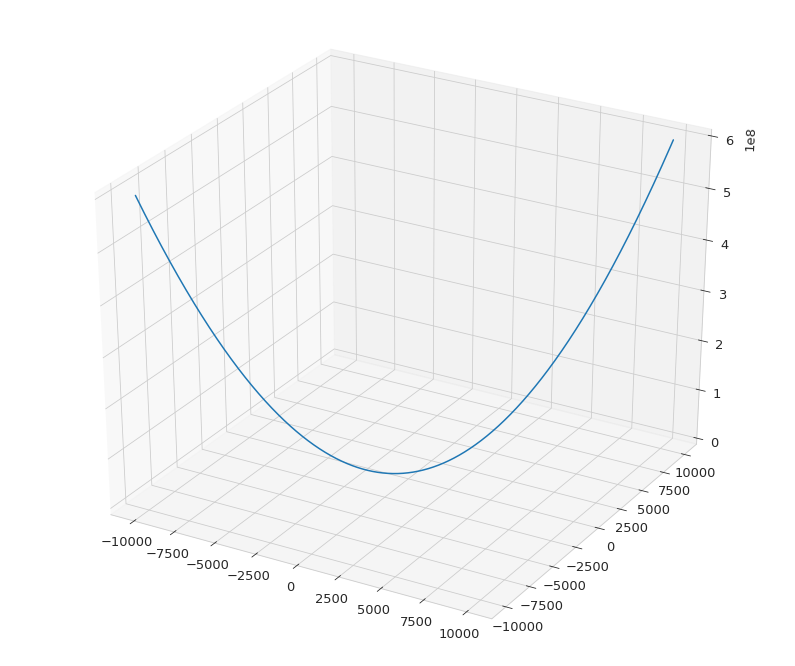

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-10000, 10000, 500000)
Y = np.linspace(-10000, 10000, 500000)
Z = f(X, Y)
ax.plot(X, Y, Z)
min(Z)# 0.0024